# Apothecary Analysis Demo Notebook

### This notebook uses a limited set of censored, randomized or partial data to demonstrate the automation of analysis that has been organized.

### Some interactive graphs will launch in other tabs, and some will save within the directory only if you enable 'Trust Notebook' in the File tab.

In [19]:
#bokeh is required in this module.
import sys
!{sys.executable} -m pip install bokeh

In [1]:
# Setting up the work space
import information_repository as ir
import utility as u
import macro_analysis as ma
import inventory_order_prediction as iop
import pandas as pd

In [2]:
# We need to load our dummy csv with modified values for privacy.
df = pd.read_csv('dummy.csv')

In [5]:
#We can see a small slice of the censored information
df.head(3)

,Unnamed: 0,Order_Date,Email_Billing,Full_Name_Billing,Customer_Role,Customer_first_order_date,Customer_last_order_date,Customer_Total_Orders,Customer_Total_Spent,Full_Name_Shipping,...,City_Shipping,State_Name_Shipping,Postcode_Shipping,Country_Name_Shipping,Product_Name,Item_Cost,Item_Name,Quantity,Discount_Amount,Order_Total_Amount
0,0,2020-09-01 01:33,cb128d,Restricted,Customer,2020-04-23 04:23,2020-09-01 01:33,3.0,268.97,Restricted,...,London,United Kingdom,E11 1EX,United Kingdom (UK),"Sleep Aid | CBD + Valerian, Chamomile, Skull C...",49.99\r\n15\r\n15,"Sleep Aid | CBD + Valerian, Chamomile, Skull C...",1\r\n1\r\n1,23.64007,94.99
1,1,2020-09-01 03:26,04f96e,Restricted,Customer,2020-09-01 03:26,2020-09-01 03:26,1.0,47.99,Restricted,...,Kittery,Maine,03904,United States (US),"Mental Clarity | CBD + Ginkgo Leaf, Shatavari,...",29.99\r\n18,"Mental Clarity | CBD + Ginkgo Leaf, Shatavari,...",1\r\n1,31.99000,47.99
2,2,2020-09-01 04:32,1e68a1,Restricted,Wholesale Customer,2020-08-17 10:08,2020-09-01 04:32,3.0,2086.00,Restricted,...,West Winfield,New York,13491,United States (US),Mighty Matcha | CBD Matcha\r\nLavender | CBD H...,7.5\r\n5.25\r\n5.25,Mighty Matcha | CBD Matcha - Matcha (1 Bag)\r\...,12\r\n12\r\n12,23.64007,236.00


You can see that some of the item columns are in their native, dirty format and are somewhat unreadable. The modules we loaded above automatically treat them when necessary, and are a quicker solution that treating new csvs every month.


## Macro Analysis

#### The following analysis class explores general macro analysis metrics and provides an overview of how the company is doing.

In [3]:
#We can quickly arm our dataframe to a class object and explore the data

analysis = ma.DataFrameAnalysis(df)
method_list = [method for method in dir(ma.DataFrameAnalysis) if method.startswith('__') is False]
print(method_list)

['avg_discount_rate', 'customer_role_breakdown', 'geographical_breakdown']


In [ ]:
# The average discount rate for all orders, wholesale and retail.
analysis.avg_discount_rate()

                           Retail  Wholesale
Proportional Order Counts      97          3
Proportional Sales             83         17


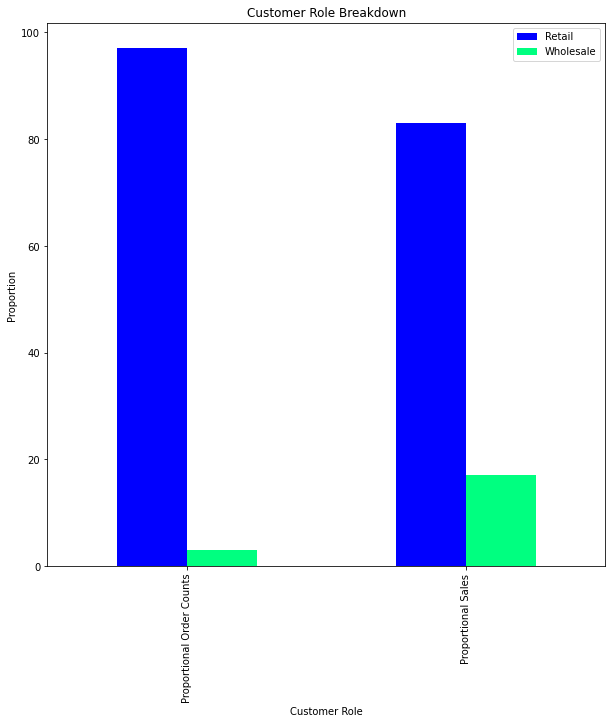

In [7]:
# The next function breaks down proportional sales totals and order quantities by retail and wholesale.
analysis.customer_role_breakdown()

In [5]:
# We can use geographical_breakdown() to show an interactive sales scatter plot with sales metrics by state.
analysis.geographical_breakdown()

                  States  Counts  Sales_Total  Avg_Purchase_Revenue
0             California     901        53121                    58
1               New York     538        32878                    61
2                  Texas     500        34029                    68
3         North Carolina     441        29661                    67
4                Florida     398        23968                    59
5                 Oregon     359        18754                    52
6               Virginia     356        20575                    57
7           Pennsylvania     282        14924                    52
8             New Jersey     271        17978                    66
9               Illinois     255        14249                    55
10            Washington     248        14458                    58
11              Maryland     216        14662                    66
12                  Ohio     198        13462                    67
13         Massachusetts     189        11198   

## ProductAnalysis Class

#### Analysis by product, product line and/or month.

In [17]:
# To explore product analysis, we simply load the ProductAnalysis 
product_analysis = ma.ProductAnalysis(df)
method_list = [method for method in dir(ma.ProductAnalysis) if method.startswith('__') is False]
print(method_list)

['highest_negative_product_change_over_month_analysis', 'highest_positive_product_change_over_month_analysis', 'monthly_product_frame', 'product_line_change_over_month_analysis', 'product_line_change_over_month_graph', 'serve_time_span']


highest_negative and highest_positive analysis functions operate by a single month/combination inputted by the user after function call

In [19]:
product_analysis.highest_negative_product_change_over_month_analysis()

Type the year you would like to query in yyyy format:  2020
Type the month you would like to query:  10
     year month count  revenue change_over_month               product
203  2020    10    45   587.49               -75             Pain Away
185  2020    10   105  1417.34               -72        Oolong Passion
83   2020    10    44  1133.95               -55         Dragon's Lair
143  2020    10   168  1617.57               -49  Kush Hemp CBD Flower
53   2020    10   244  2335.16               -46       Chocodelic Trip


The intention of these functions is for both inventory management and quality control. If the ordering manager is not aware of the changes in sales, they might order too much or too little.

If a products sales is dropping at a faster rate than the product line and despite the overall sales trends, there may be some quality control issues to be addressed.

In [20]:
product_analysis.product_line_change_over_month_graph()

C:\Users\fritz\Brothers Analysis Walkthrough\macro_analysis.py:196: RuntimeWarning: divide by zero encountered in double_scalars
  avg_change_over_month = (this_month_revenue / last_month_revenue) * 100


   Year  Month        Tea   Capsules  Smokeables   Skincare  Superfood  \
0  2020      9   0.000000   0.000000    0.000000   0.000000   0.000000   
1  2020     10   1.501693 -19.064686    3.546208 -17.369575  -8.805914   
2  2020     11  72.819599  28.213001   -0.327453  65.756246  73.244378   
3  2020     12  22.121478  10.031025   -2.536748  69.121422  87.692350   
4  2021      1   1.079684 -18.751142   -6.909042  -7.281633  35.005804   
5  2021      2  -9.750926 -16.514950  -28.977374 -23.864403  -7.617623   

       Honey  Tinctures  
0   0.000000   0.000000  
1 -17.922594 -37.484786  
2  -0.050026  21.959456  
3   7.780408  10.078625  
4  53.886153 -18.886317  
5 -11.225841   8.094032  


### Inventory Ordering Predictor

The last major analysis class is the inventory_predictor, which calculates an estimate of the volume of ingredients used over a period by converting sales . It is intended for use in predicting the ordering quantities in materials orders.

It requires a csv named product_sales.csv in the directory.

In [6]:
i_p = ma.InventoryPredictor()
# It has a single active function for outputting a csv with product totals
i_p.ingredient_volume_table()
# I have inserted randomized dummy values in place of the accurate measures for privacy.

initiating
Blood Flow Local Organic Hemp 775.432 current ingredient volume
Blood Flow Dehydrated Coconut Milk Powder 1545.4959999999999 current ingredient volume
Blood Flow Garlic Powder 780.8000000000001 current ingredient volume
Blood Flow Birch Bark Powder 780.8000000000001 current ingredient volume
Blood Flow Butcher's Broom Powder 780.8000000000001 current ingredient volume
Blue Moon Dehydrated Coconut Milk Powder 44257.704000000005 current ingredient volume
Blue Moon Coconut Sugar 31115.895999999997 current ingredient volume
Blue Moon Blue Pea Flower Powder 9426.220000000001 current ingredient volume
Blue Moon Pumpkin Spice Powder 4714.984 current ingredient volume
Blue Moon Jujube Powder 281.09999999999997 current ingredient volume
Blue Moon Chamomile Flower Powder 281.09999999999997 current ingredient volume
Blue Moon Polygala Powder 281.09999999999997 current ingredient volume
Blue Moon Vanilla Bean Powder 753.3480000000001 current ingredient volume
Blue Moon Himalayan Salt 37

In [8]:
# Lets see what the output is like
ingredient_table = pd.read_csv('ingredient_volume_table.csv')
ingredient_table.head(10)
# All solid ingredients are in grams. All liquid ingredients are in ounces.

,Unnamed: 0,Ingredient,Volume (gram or oz)
0,0,Dehydrated Coconut Milk Powder,292893.476
1,1,Local Organic Hemp,137939.521
2,2,Chai Mix,79509.940
3,3,Peppermint,56709.717
4,4,Cane Sugar,55758.585
5,5,Hibiscus,46168.120
6,6,Chamomile,44797.616
7,7,Coconut Sugar,42902.573
8,8,Spearmint,42388.262
9,9,Oolong,35898.384
